## 1. Import the Libraries

In [1]:
# Import Numpy, Pandas, Matplotlib and Seaborn libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load the Data

In [2]:
# Load the dataset (read from .csv file and set it to a Pandas DataFrame)
salary_df = pd.read_csv('Salary_Data.csv')

## 3. Exploratory Data Analysis

- Study the dataset and describe the columns to understand the data
- Aim is to gain intuition about the data, good understanding of the dataset, some notes for Data Cleaning, and possibly some ideas for Feature Engineering

### 3.1 Check out the Data

#### Insights we could draw from the data:
1. To get to know the data
2. Answer a set of basic questions about the dataset:	
    - How many observations do we have?
	- How many features?
        - Which features are available in the dataset?
	- What are the data types of the features?
        - Which features are numerical?
        - Which features are categorical?
        - Which features are mixed data types?
	- Do we have a target variable (label)?
    - What is the distribution of numerical feature values across the samples?

In [3]:
# Display the few top rows of a DataFrame
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Shape of the dataset
salary_df.shape

(30, 2)

In [5]:
# List of the column names
salary_df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
# List of all numerical columns
salary_df.select_dtypes(include='number').columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
# List of all non-numerical columns
salary_df.select_dtypes(exclude='number').columns

Index([], dtype='object')

In [8]:
# Data type of each column in a DataFrame
salary_df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
# Find out how many entries (rows and columns) there are, what type of objects are in the DataFrame (to observe if they have the correct type) etc.
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
# Summarize the data to see the distribution of data (Statistical information of numerical columns)
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#### Conclusion:
- The dataset contains 30 rows and 2 columns
    - **Number of observations**: 30
    - **Number of attributes**: 1 predictor variable and 1 target variable
        - **Predictor variable (feature)** is: 'YearsExperience'
        - **Target variable (label)** is: 'Salary'
- Types of the data contained within columns are float64 (2 columns) and therefore most likely a continuous variables, which means that predicting the target variable (label) is a Regression problem
    - **Numerical variables (features)** are: 'YearsExperience', 'Salary'
    - **Non-numerical variables (features)** are: /
- No missing values in the dataset
- So far, there are no feature(s) that is/are of no significance and cannot provide any insight into the dataset

### 3.2 Data Visualization

- Overall goal is **to visualize the data** and to get understanding of **which features are important** for analysis 
- **Types of plots for visualization**:
    - **Univariate plots**
        - plots of each **individual feature**
        - to better **understand each feature**
        - use Count plot, Bar plot, Histogram, Dist plot, Box plot, Whisker plot etc.
    - **Multivariate plots**
        - plots of several **(multi) features**
        - to better **understand the relationships between features**
        - Scatter plot, Heatmap, Pair plot, Bar plot etc.
- In order to select the appropriate plots for visualization, first **understand the Data Variables type (Numerical or Categorical)**:
    - Plot Categorical Distributions
    - Plot Numerical Distributions
    - Plot Correlations
    - Plot Segmentations

#### Insights we could draw from the charts:
**1. Plot Categorical Distributions**
   - Use Bar plot, Count plot
   - What is the range where the categorical feature have a large number of observations?
   - Is there are any sparse classes (classes that have a very small number of observations)?
   - Making a note to combine or reassign some of the sparse classes

**2. Plot Numerical Distributions**
   - Use Grid of Histograms, Distplot
   - What is the range where the target label is most distributed? (Check the distribution of target variable)
   - Potential outliers that don't make sense
   - Distributions that are unexpected
   - Features that should be binary (i.e. "wannabe indicator variables")
   - Boundaries that don't make sense
   - Potential measurement errors

**3. Plot Correlations**
   - Use Scatterplot, Heatmap, Barplot
   - Observe the relationships between label and all numeric features		
   - Observe the relationships between numeric features and other numeric features		
   - Which features are strongly (positively or negatively) correlated with the target variable (label)?	
   - Are there interesting or unexpected strong correlations between other features? (check for multi-co-linearity)
   - Is there any feature that is perfect predictor of the target variable (label)?
   
**4. Plot Segmentations**
   - Use Box plot
   - Observe the relationships between categorical features and label (Distribution of label per categorical feature)
   - Observe the relationships between categorical features and numeric features (Distribution of numeric feature per categorical feature)
   - Median (middle vertical bar in the box)									
   - Min and Max

In [11]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

#### 3.2.1 Plot Correlations

- Few things to look out for and insights we could draw from the charts:
   - Use Scatterplot, Heatmap, Barplot
   - Observe the relationships between label and all numeric features
   - Observe the relationships between numeric features and other numeric features
   - Which features are strongly (positively or negatively) correlated with the target variable (label)?
   - Are there interesting or unexpected strong correlations between other features? (check for multi-co-linearity)
   - Is there any feature that is perfect predictor of the target variable (label)?

In [12]:
# Check the correlation between the target variable (label) and other feature
salary_df.corr()['Salary'].sort_values(ascending=False)

Salary             1.000000
YearsExperience    0.978242
Name: Salary, dtype: float64

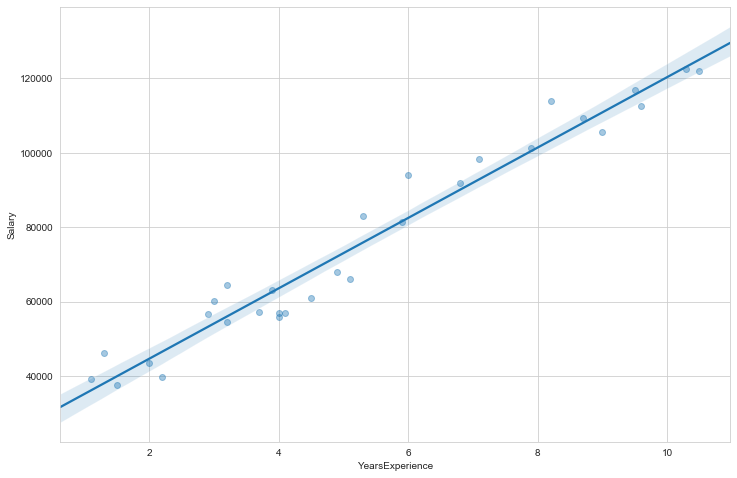

In [13]:
# Set up of the graphic area size
plt.figure(figsize=(12, 8))

# Display (plot) and explore correlations between highly correlated features with the target variable (label) through visualization
sns.regplot(x='YearsExperience', y='Salary', data=salary_df, scatter_kws={'alpha': 0.4})

#### Conclusion:

- The line of best fit is calculated by minimizing the ordinary Least Squares Error function (automatically done by the Regplot function)
- Shaded areas around the lines of best fit represent 95% confidence intervals
- The salaries increase as the number of years of experience increases, but it doesn’t look to be following exactly a linear line

## 4. Data Preprocessing and Feature Engineering

#### Data Preprocessing and Feature Engineering by:
- drop the columns (features) which are of no significance and cannot provide any insight into the dataset
- check the missing values by columns (features) and rows (observations)
- drop the columns (features) and rows (observations) with missing values
- fill in the missing values in columns (features)
- convert to a Dummy variable feature using One-hot coding
- extracting the Date
- remove erroneous values
- redundant data
- nullify the impact of outliers
- etc.

### 4.1 Identify the variables

Look at the columns of the dataset which can act as:
- Predictor variables (features)
- Target variable (label)

In [14]:
# List of the column names
salary_df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

#### Conclusion:
- **Predictor variable (feature)** is: 'YearsExperience'
- **Target variable (label)** is: 'Salary'

### 4.2 Dealing with Missing values

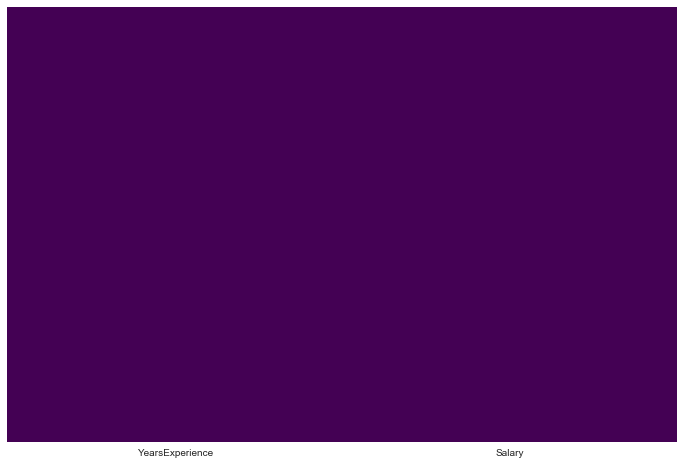

In [15]:
# Set up of the graphic area size
plt.figure(figsize=(12, 8))

# Display (plot) the missing values
sns.heatmap(data=salary_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
# Total count of missing (null) values for each column and sort them in ascending order
salary_df.isnull().sum().sort_values(ascending=False)

Salary             0
YearsExperience    0
dtype: int64

In [17]:
# Total count of missing (null) values for each column in % of the total DataFrame and sort them in ascending order
salary_df.isnull().mean().sort_values(ascending=False)*100

Salary             0.0
YearsExperience    0.0
dtype: float64

#### Conclusion:

- No missing values in the dataset

### 4.3 Dealing with Outliers

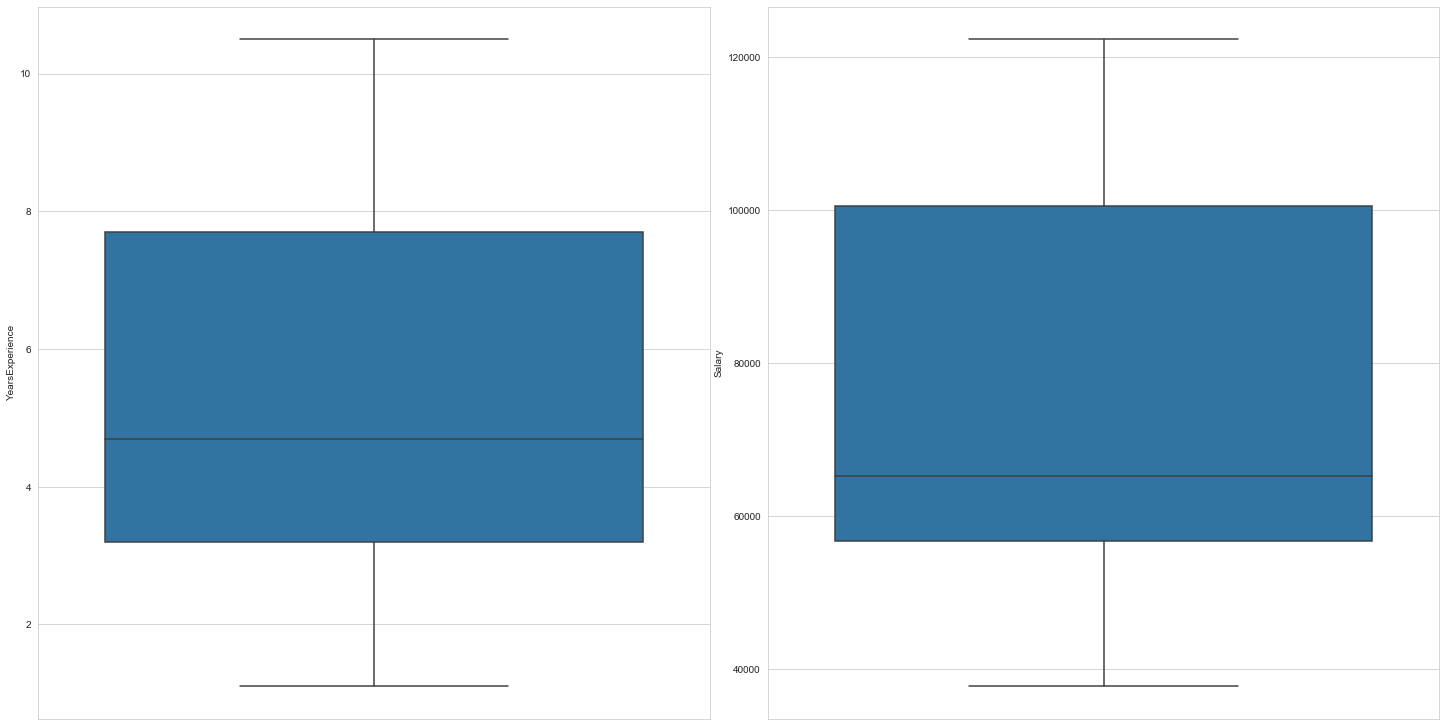

In [18]:
# Display (plot) and explore the dataset to see trends / statistics
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in salary_df.items():
    sns.boxplot(y=k, data=salary_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [19]:
# Percentage of Outliers in columns using InterQuartile Range (IQR) score
for k, v in salary_df.items():
        Q1 = v.quantile(0.25)   # Lower quartile
        Q3 = v.quantile(0.75)   # Upper quartile
        IQR = Q3 - Q1           # IQR score
        
        cut_off = 1.5 * IQR     # Calculate the Outlier cutoff
        lower = Q1 - cut_off
        upper = Q3 + cut_off
        
        v_col = v[(v <= lower) | (v >= upper)]                       # Detecting Outliers with IQR score
        perc = np.shape(v_col)[0] * 100.0 / np.shape(salary_df)[0]   # Percentage of Outliers in columns
        print("Column %s outliers = %.2f%%" % (k, perc))

Column YearsExperience outliers = 0.00%
Column Salary outliers = 0.00%


#### Conclusion:
- Columns do not have outliers

## 5. Statistics

In [20]:
# Import statsmodels module
import statsmodels.api as sm

In [21]:
# Create independent variable and add constant to data
X_ols = sm.add_constant(salary_df['YearsExperience'])

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [22]:
# Create Linear Regression object and fit the model
lm_ols = sm.OLS(salary_df['Salary'], X_ols).fit()

In [23]:
# Summary of the Linear Regression model
lm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.14e-20
Time:                        21:15:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion:
- Summary of Simple Linear Regression model:
    - There is 1 (one) input parameter (predictor): YearsExperience, and the value of the Model Coefficient of this parameter (predictor) is 9449.9623
    - **Interpreting the Model Coefficient**:
        - A 1 unit increase in YearsExperience is associated with an increase of 9449.9623 in Salary
    - Standard Error (SE) of the parameter (predictor) is 378.755
    - lowest **p - value** is in case of the YearsExperience parameter (predictor) and is less than 1% (small value of 0.000), which means that:
        - this is the most signifigant X variable in the model that have highest impact on Y variable
        - there is signifigant relationship between X (YearsExperience) and Y (Salary) variables
    - R-squared and Adjusted R-squared are greater than 0.5%, which means that the quality of Simple Linear Regression fit is very good (assessment of the Model Accuracy)
    - Prob (F-statistic) is very low (=1.14e-20), which means that the independent variable have some impact on dependent variable
    - Df (Degrees of freedom) Residuals is 28 (n-p-1=30-1-1; where n is No. Observations, p is Df Model (No. Predictors))

## 6. Train and Test the Linear Regresion model

### 6.1 Split the columns

- Separate features columns (X) from target variable (label) column (y)
- Split columns into:
    - X-array contains the features columns that we are going to train (only numerical columns)
    - y-array contains the target variable (label) column (what we try to predict)

In [24]:
# List of the column names
salary_df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [25]:
# X-array
X = salary_df.drop('Salary', axis=1)

# y-array
y = salary_df['Salary']

### 6.2 Split the data into Training dataset and Testing dataset

- Training dataset is used to train out the model
- Testing dataset is used to test (evaluate) the model once it is trained
- Split the data into Training dataset and Testing dataset by Tuple unpacking
    - test_size is the percentage of dataset that we want to be allocated to the test size (0.3 = 30%)
    - random_state is specific set of random splits on data
- Split the Salary Data dataset (30 observations) into:
    - 70% Training data (21 observations)
    - 30% Testing data (9 observations)

In [26]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [27]:
# Split the data into Training dataset and Testing dataset by Tuple unpacking
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [28]:
print(len(X_train),' samples in Training dataset\n',
      len(X_test),' samples in Testing dataset\n', )

21  samples in Training dataset
 9  samples in Testing dataset



In [29]:
# Shape of X_train dataset
X_train.shape

(21, 1)

In [30]:
# Shape of y_train dataset
y_train.shape

(21,)

In [31]:
# Shape of X_test dataset
X_test.shape

(9, 1)

In [32]:
# Shape of y_test dataset
y_test.shape

(9,)

### 6.3 Create the Linear Regression model

In [33]:
# Import the 'Linear Regression' model from family 'linear_model' of Scikit-Learn
from sklearn.linear_model import LinearRegression

In [34]:
# Instantiate the LinearRegression() model (Estimator) with parameters
# Create an instance of class LinearRegression() model (Linear Regression object)
lm = LinearRegression()

### 6.4 Train / fit the Linear Regression model

In [35]:
# Train / fit the Linear Regression model on Training dataset
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 6.5 Calculate the coefficients of Linear Regression equation

#### Coefficients of Linear Regression equation (y = a * x + b) are:
- a - slope, which represents the effect x has on y
- b - intercept, which is a constant

#### Intercept (b)

In [36]:
# Explore the intercept
print(lm.intercept_)

25975.81465954113


#### Slope (a)

In [37]:
# Check out the model's slopes that relate to each feature in the dataset
lm.coef_

array([9577.17174975])

In [38]:
# Format the model's slopes by creating DataFrame
cdf = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Slopes'])
cdf

,Slopes
YearsExperience,9577.17175


##### Conclusion:
Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in YearsExperience is associated with an increase of 9577.17 in Salary

### 6.6 Predictions from the model on Testing data

- Predictions from the model are performed with observations that the model has never seen before.
- Observations were previously stored in the Testing dataset (X_test)

In [39]:
# Get the predictions from the model based of the Testing dataset
y_pred = lm.predict(X_test)
y_pred

array([ 91100.58255782, 109297.20888234,  56622.76425873,  82481.12798305,
        40341.57228416, 117916.66345711, 116958.94628213,  74819.39058325,
       112170.36040726])

Text(0.5, 1.0, 'Salary vs. Predicted Salary')

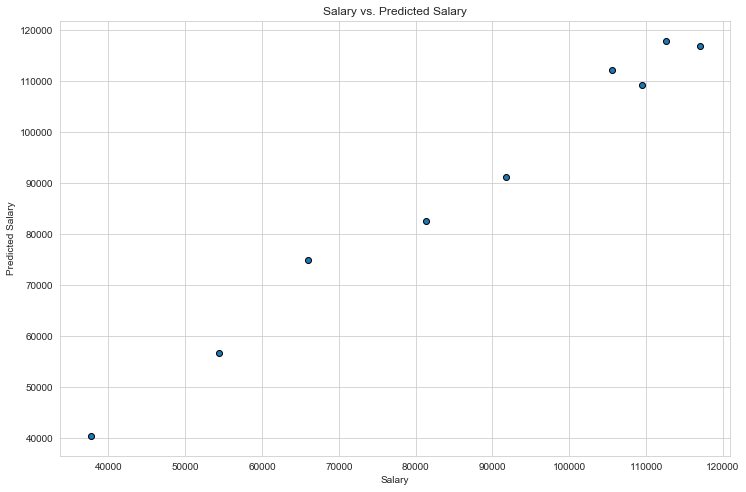

In [40]:
# Set up of the graphic area size
plt.figure(figsize=(12, 8))

# Display (plot) and explore the comparison between the predicted output values (y_pred) and real output values (y_test)
plt.scatter(y_test, y_pred, edgecolor='black')
plt.xlabel("Salary")
plt.ylabel("Predicted Salary")
plt.title("Salary vs. Predicted Salary")

##### Conclusion:
- Scatter plot of the real test output values vs. the predicted output values should create a linear line, but since the model does not fit 100%, the scatter plot is not creating a perfect straight line

### 6.7 Evaluate the model on Testing data

#### Linear Regression Evaluation metrics

- The goal is to create the best fitted model i.e. to minimize the Linear Regression metrics (errors) (minimum cost)		
- Evaluation of the model:	
        1. Determine the best fitted Linear Regression equation (line) that will be used to make predictions	
        2. Minimize the Loss (Cost) Function	
- Loss (Cost) Function is the difference between actual output value (Yi) and predicted output value (Ŷi)	
- Loss (Cost) Functions for Linear Regression are:	

    - **Mean Absolute Error (MAE)**
    $$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
    
    - **Mean Squared Error (MSE)**
    $$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
    
    - **Root Mean Squared Error (RMSE)**
    $$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [41]:
# Import metrics function from Scikit-Learn
from sklearn import metrics

In [42]:
# MAE - Mean of the absolute value of the errors
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 3038.6823612518806


In [43]:
# MSE - Mean of the squared errors
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 17978409.49734415


In [44]:
# RMSE - Square root of the mean of the squared errors
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 4240.095458517903


##### Conclusion:
- As the RMSE value >> 5, the ability of the model to accurately predict the data is very poor

## 7. Predict the label on new data

In [45]:
# Random new example (2nd observation) with only features and dropped target label
new_salary = [[2.0]]

In [46]:
# Predict the label of the new example
lm.predict(new_salary)

array([45130.15815903])

In [47]:
# True value of 2nd observation
salary_df['Salary'].iloc[3]

43525.0

In [48]:
# Random new example (2nd observation) with only features and dropped target label
new_salary = [[15.0]]

In [49]:
# Predict the label of the new example
lm.predict(new_salary)

array([169633.39090574])